# 인공지능이론 및 프로그래밍 실습강의 6

## SVM (Support Vector Machine)

Reference: 
    Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2nd Edition, Aurelien Geron

### Maximum margin classfication with SVM

#### Linear SVM Classification

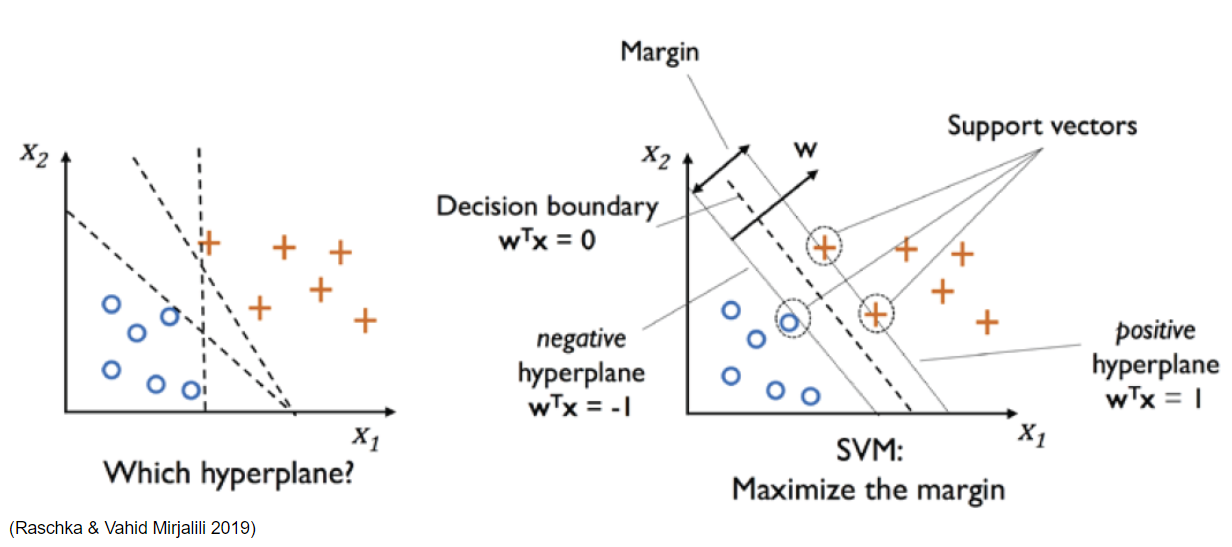

In [ ]:
## SVM (Support Vector Machine)

#### SVM은 특성치들의 scale에 매우 민감함.

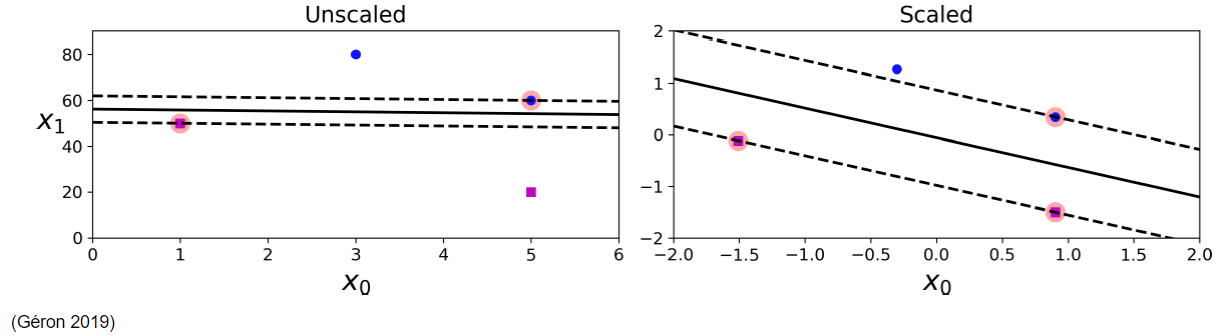

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, centers=2, random_state=3)

def plot_dataset(X, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X[:, 0], X[:, 1], 
                s=20,
                c=y, cmap=plt.cm.Set1)
    plt.axis('tight')
    plt.grid(True, which='both')
    plt.xlim([min(X[:,0])*1.05,max(X[:,0])*1.05])
    plt.ylim([min(X[:,1])*1.05,max(X[:,1])*1.05])
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y)
plt.show()

In [ ]:
def plot_decision_SVM(X, y, clf):
    plt.figure(figsize=(8,6))
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min(X[:,0]), max(X[:,0]))
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
                s=150, 
                linewidths=1.5,
                edgecolors='green',
                facecolors='none')
    plt.scatter(X[:, 0], X[:, 1], 
                s=20,
                c=y, cmap=plt.cm.Set1)
    plt.grid(True, which='both')
    plt.xlim([min(X[:,0])*1.05,max(X[:,0])*1.05])
    plt.ylim([min(X[:,1])*1.05,max(X[:,1])*1.05])
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.axis('tight')
    
    plt.show()

In [ ]:
import numpy as np
from sklearn.svm import SVC #Support Vector Classficiation

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X, y)

plot_decision_SVM(X,
                  y,
                  svm)

In [ ]:
axis0 = X[:,0] * 10
print(axis0.shape)
axis1 = X[:,1] * 1
scaled_X = np.array((axis0,axis1)).transpose()
scaled_svm = SVC(kernel='linear', C=1, random_state=1)
scaled_svm.fit(scaled_X, y)

plot_decision_SVM(scaled_X,
                  y,
                  scaled_svm)

In [ ]:
from sklearn.preprocessing import StandardScaler
#StandardScaler -> data의 평균이 0 표준편차가 1이 되도록 변환! 
sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X)

In [ ]:
std_svm = SVC(kernel='linear', C=1, random_state=1)
std_svm.fit(X_train_std, y)
plot_decision_SVM(X_train_std,
                  y,
                  std_svm)

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, random_state=4)
plot_dataset(X, y)

#### Hyper parameter C

**C=3000 -> hard margin**

In [ ]:
sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X)
std_svm = SVC(kernel='linear', C=3000, random_state=1)
std_svm.fit(X_train_std, y)

plot_decision_SVM(X_train_std,
                  y,
                  std_svm)

**C=1 -> soft margin**

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, random_state=4)

sc = StandardScaler()

sc.fit(X)
X_train_std = sc.transform(X)
std_svm = SVC(kernel='linear', C=1, random_state=1)
std_svm.fit(X_train_std, y)
plot_decision_SVM(X_train_std,
                  y,
                  std_svm)

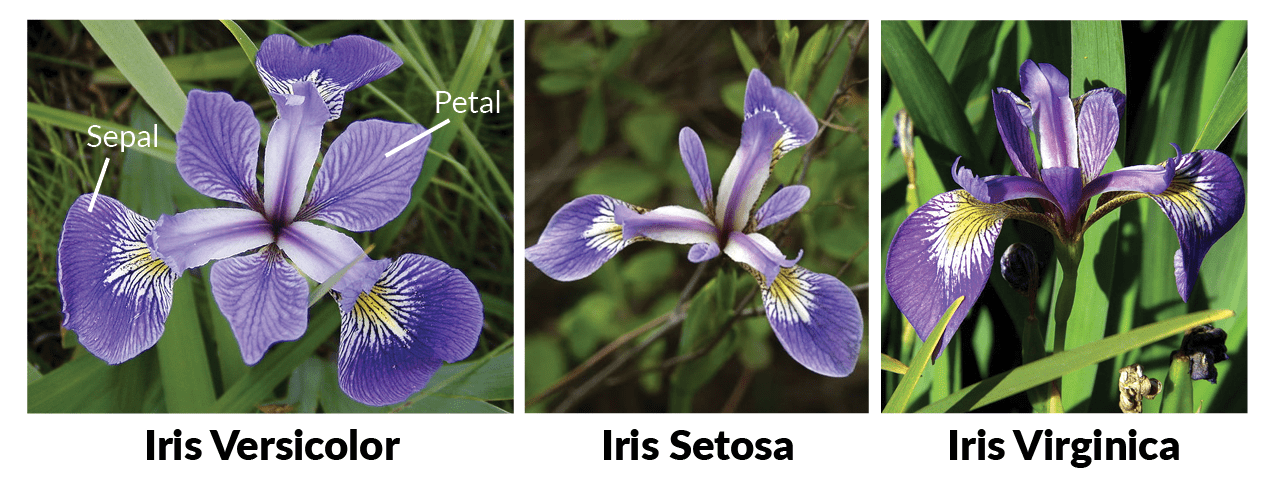

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # 인덱스가 0부터 시작하므로 세 번째와 네 번째 column
y = iris.target

print('class label:', np.unique(y))

#0 - Iris Versicolor
#1 - Iris Setosa
#2 - Iris Virginica

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.05):

    # marker와 colormap 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #  decision region 가시화
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1.5,
                    marker='o',
                    s=100, 
                    label='test set')

In [ ]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

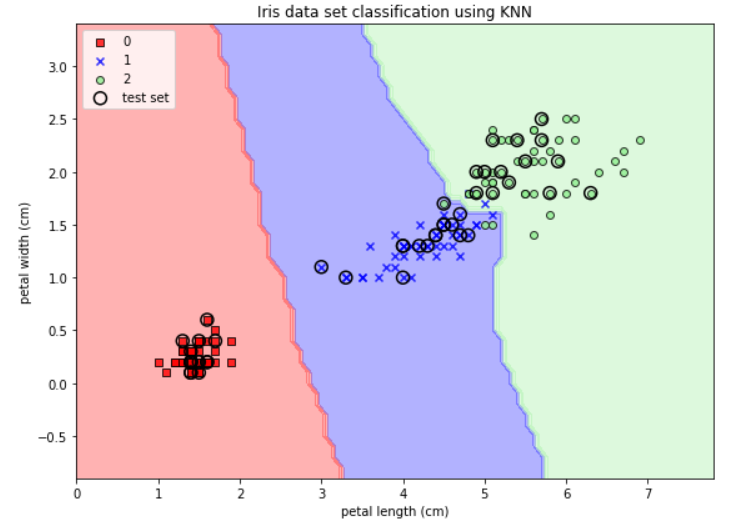

#### Nonlinear SVM Classification

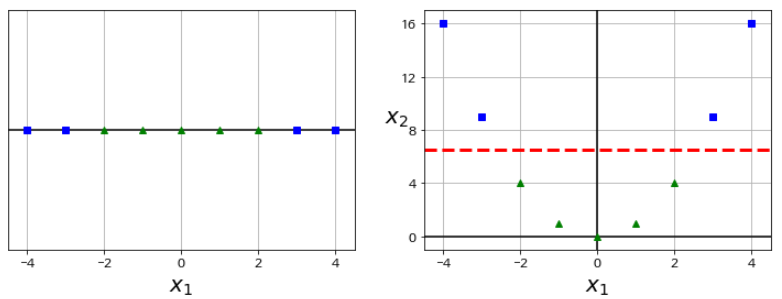

1개의 특성을 가진 $ x_1 $ data를  어떻게 해야 선형 분류를 할 수 있을까?

---

다항 특성을 추가하여 새로운 데이터 셋을 만든다.  
$ x_2 = (x_1)^2 $ 인 새로운 다항 특성인 $ X_2 $를 추가함으로 써 1차원 데이터셋이 2차원으로 분류가 되는 것을 확인할 수 있다.  
그리고 이것이 기본적인 kernel의 아이디어이다.

---

##### - **Polynomial kernal**
$$ K(x_i,x_j) = (\gamma x_i^T \cdot x_j + r)^d $$


In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

plot_dataset(X, y)
plt.show()

**d=2 r=1 c=5 (Polynomial kernal)** 


In [ ]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=2, coef0=1, C=5))  # default: coef0=0
])
poly_kernel_svm_clf.fit(X,y)

In [ ]:
plot_decision_regions(X, y, poly_kernel_svm_clf)

**d=3 r=1 c=5 (Polynomial kernal)** 

In [ ]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))  # default: coef0=0
])
poly_kernel_svm_clf.fit(X,y)

In [ ]:
plot_decision_regions(X, y, poly_kernel_svm_clf)

##### - **Gaussian Radial Basis Function kernal**
$$ K(x_i,x_j) = \exp(- ||x_i-x_j||^2/2\sigma^2 ) $$
$$ \gamma = 1 / 2\sigma^2 $$
$$ K(x_i,x_j) = \exp(- \gamma ||x_i-x_j||^2) $$

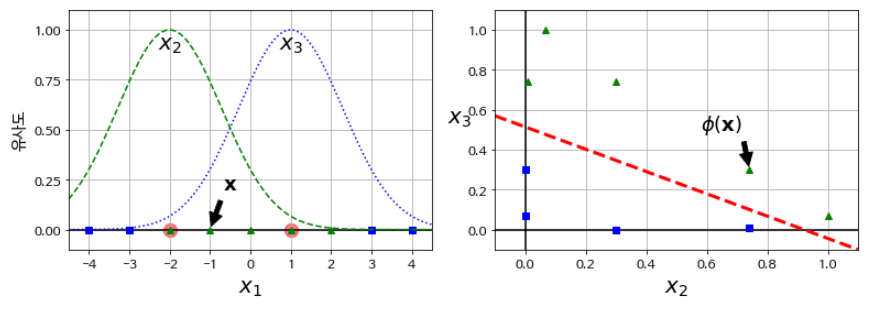

$ \gamma $가 0.3인 커널펑션을 풀어보자!

n개의 특성을 가지는 m개의 data를
m개의 특성을 가지는 m개의 data로 변환!

In [ ]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
    ])
rbf_kernel_svm_clf.fit(X,y)
plot_decision_regions(X, y, rbf_kernel_svm_clf)

In [ ]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X,y)
plot_decision_regions(X, y, rbf_kernel_svm_clf)

In [ ]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000))
    ])
rbf_kernel_svm_clf.fit(X,y)
plot_decision_regions(X, y, rbf_kernel_svm_clf)

In [ ]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X,y)
plot_decision_regions(X, y, rbf_kernel_svm_clf)

## HW3

---

Q1. 아래 주어진 XOR data set을 구분하는 SVM 코드를 만들고, 왜 그 model을 만들었는지를 설명할 것.

Q2. Hyper parameter를 선정 (tuning) 하는 방법에 대하여 찾아보고 코드로 구현하고 설명할 것.

워드로 작성!  
기한 10월 23일 0:00시
블랙보드에 업로드!

In [ ]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0) # logical_xor(X1,X2) X1과 X2중 하나만 true일 경우에만 true return
y_xor = np.where(y_xor, 1, -1) # y_xor가 true이면 1을 false이면 -1을 할당

plot_dataset(X_xor, y_xor)